# Libraries

Import packages



In [ ]:
!pip install face-recognition --quiet
!pip install imutils
!pip install matplotlib --upgrade

     |████████████████████████████████| 100.1 MB 19 kB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.4 MB 22.4 MB/s 
     |████████████████████████████████| 965 kB 39.4 MB/s 
     |████████████████████████████████| 295 kB 61.2 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [ ]:
import matplotlib.pyplot as plt 
import cv2
import os
import time
import datetime
import dlib
import random
import math

# standard libraries
import pandas as pd
import numpy as np
import operator
import pathlib

# visualizations
from IPython.display import Image
%matplotlib inline

# individual classifiers/ clustering
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC

from google.colab.patches import cv2_imshow
from skimage.morphology import octagon
from skimage.feature import (corner_subpix, corner_peaks, corner_harris, hog,
                             corner_orientations, local_binary_pattern)
from PIL import Image, ImageDraw
import scipy
from scipy import ndimage
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
# Need GPU for the below
import face_recognition

import keras
import keras.utils

#Dataset

Mount google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


Import and uncompress zipfile of image data

In [ ]:
#import zipfile
#with zipfile.ZipFile("/content/drive/MyDrive/281/Archive_filtered5.zip", 'r') as zip_ref:
#    zip_ref.extractall("/content/fer2013-5/")

#!unzip /content/drive/MyDrive/281/Archive_filtered5.zip

##Reading images from the Dataset

We will be working with the open source Facial Images dataset, available on kaggle.com

https://www.kaggle.com/jonathanoheix/face-expression-recognition-dataset

Read images from all 7 classes of images. 

#Exploratory Data Analysis (EDA)

In this section of the python notebook, we will analyze the images in each class and identify non-facial images and duplicates in each class as well as images that are cross labelled across classes.

###Bar chart - Total per Class

angry : 686 images
disgust : 80 images
fear : 505 images
happy : 1791 images
neutral : 1294 images
sad : 602 images
surprise : 387 images


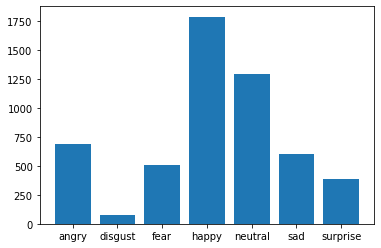

In [ ]:
emotions = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
dict_ = {}
min_images = 99999
file_base = './drive/MyDrive/281/dataset_filtered_consolidated5/'
for emotion in emotions:
    img_num = len(os.listdir(file_base + emotion))
    print(emotion, ':', img_num, 'images') 
    dict_[emotion] = img_num

plt.bar(*zip(*dict_.items()))
plt.show()

In [ ]:
sorted_dict = dict(sorted(dict_.items(), key=lambda item: item[1]))
print(sorted_dict)
print(sum(sorted_dict.values()))

{'disgust': 80, 'surprise': 387, 'fear': 505, 'sad': 602, 'angry': 686, 'neutral': 1294, 'happy': 1791}
5345


In [ ]:
i = 0
X = np.zeros((int(sum(sorted_dict.values())),48*48))
Y = list() 

for emotion in emotions:
    for file in os.listdir(file_base + emotion):
        X[i,:] = cv2.imread(file_base+emotion+'/'+file)[:,:,0].flatten()
        Y.append(emotion)
        i += 1


In [ ]:
#X: Image data (flattened 48x48 matrix)
#Y: Label of the data (expression category)
print(X.shape)
print(len(Y)) 

(5345, 2304)
5345


In [ ]:
# Shuffle images in datasets
shuffle = np.random.permutation(np.arange(len(Y)))
X_data, Y_data = np.array(X)[shuffle], np.array(Y)[shuffle]

disgust -> 80
surprise -> 387
fear -> 505
sad -> 602
angry -> 686
neutral -> 1294
happy -> 1791
2967
2378
5345


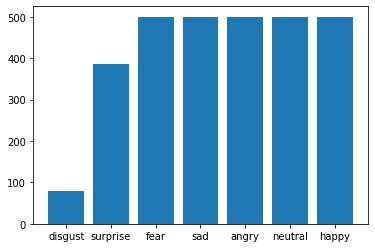

In [ ]:
images_4_model = 0
removal_index = []
new_dict_ = {}
for key in sorted_dict:
    print(key, '->', sorted_dict[key])
    max_images = 0
    if sorted_dict[key] > 500:
        max_images = 500
    else:
        max_images = sorted_dict[key]
    i = 0
    for x in range(len(Y_data)):
        if (Y_data[x] == key):
           if (i >= max_images):
               removal_index.append(x)
           else: 
               i += 1
    new_dict_[key] = max_images       
    images_4_model += max_images

print(images_4_model)

print(len(removal_index))
print(len(Y_data))

plt.bar(*zip(*new_dict_.items()))
plt.show()

In [ ]:
print(removal_index)
## Filtering Data
## remove these selected indices of data
X_data = np.delete(X_data, removal_index, 0)
Y_data = np.delete(np.array(Y_data), removal_index, 0).tolist()

[5299, 5300, 5320, 5341, 5343, 4473, 4482, 4483, 4498, 4507, 4524, 4525, 4526, 4529, 4541, 4544, 4548, 4560, 4562, 4584, 4586, 4595, 4601, 4602, 4605, 4618, 4648, 4662, 4667, 4681, 4693, 4695, 4718, 4719, 4736, 4743, 4751, 4760, 4763, 4773, 4784, 4794, 4798, 4806, 4819, 4820, 4838, 4842, 4864, 4886, 4913, 4919, 4922, 4923, 4924, 4934, 4941, 4942, 4951, 4956, 4959, 4964, 4967, 4968, 4997, 5001, 5002, 5010, 5013, 5020, 5022, 5034, 5046, 5055, 5058, 5064, 5071, 5082, 5102, 5109, 5111, 5121, 5139, 5148, 5155, 5159, 5177, 5187, 5204, 5222, 5225, 5226, 5247, 5259, 5264, 5265, 5273, 5280, 5306, 5308, 5315, 5317, 5329, 5330, 5333, 5335, 5342, 3988, 4006, 4025, 4032, 4037, 4041, 4056, 4060, 4074, 4075, 4093, 4099, 4109, 4111, 4118, 4123, 4135, 4156, 4158, 4163, 4166, 4177, 4203, 4213, 4215, 4218, 4219, 4224, 4232, 4244, 4245, 4247, 4257, 4262, 4277, 4283, 4288, 4293, 4297, 4302, 4303, 4304, 4314, 4337, 4338, 4346, 4354, 4378, 4384, 4387, 4391, 4398, 4404, 4412, 4416, 4420, 4427, 4448, 4455, 445

In [ ]:
print(X_data.shape)
print(len(Y_data))

(2967, 2304)
2967


disgust -> 80
surprise -> 387
fear -> 500
sad -> 500
angry -> 500
neutral -> 500
happy -> 500
2967


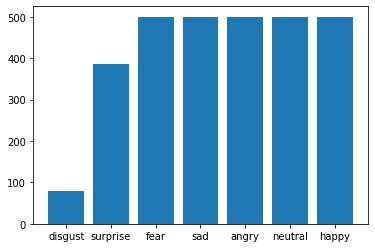

In [ ]:
new_dict2_ = {}
i=0
for key in new_dict_:
    print(key, '->', new_dict_[key])
    i = 0
    for x in Y_data:
        if (x == key):
            i += 1
    new_dict2_[key] = i

print(len(Y_data))

plt.bar(*zip(*new_dict2_.items()))
plt.show()

###Test Train Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.20, stratify=Y_data)
X_rem, X_valid, y_rem, y_valid = train_test_split(X_train, y_train, test_size=0.20, stratify=y_train)

In [ ]:
print(X_train.shape)
print(len(y_train))
print(X_test.shape)
print(len(y_test))
print(X_valid.shape)
print(len(y_valid))


(2373, 2304)
2373
(594, 2304)
594
(475, 2304)
475


disgust -> 80
Train  64
Test  16
Valid  13
surprise -> 387
Train  309
Test  78
Valid  62
fear -> 500
Train  400
Test  100
Valid  80
sad -> 500
Train  400
Test  100
Valid  80
angry -> 500
Train  400
Test  100
Valid  80
neutral -> 500
Train  400
Test  100
Valid  80
happy -> 500
Train  400
Test  100
Valid  80


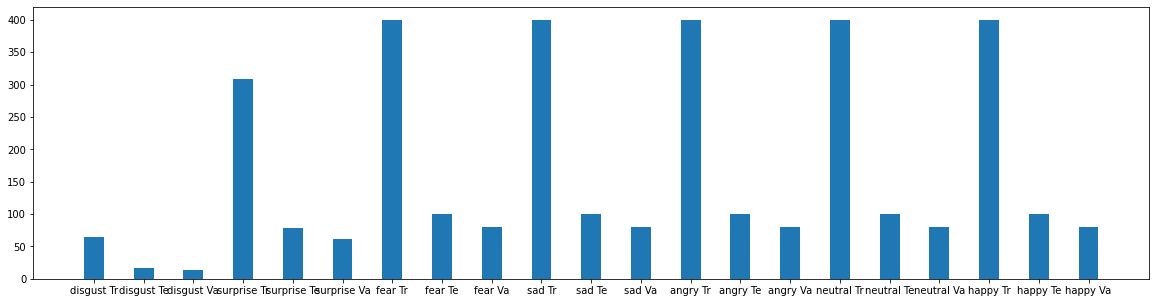

In [ ]:
new_dict2_ = {}
i=0
for key in new_dict_:
    print(key, '->', new_dict_[key])
    i = 0
    for x in y_train:
        if (x == key):
            i += 1
    new_dict2_[key+" Tr"] = i
    print("Train ", i)
    i = 0
    for x in y_test:
        if (x == key):
            i += 1
    new_dict2_[key+ " Te"] = i
    print("Test ", i)
    i = 0
    for x in y_valid:
        if (x == key):
            i += 1
    new_dict2_[key+ " Va"] = i
    print("Valid ", i)
plt.rcParams["figure.figsize"] = (20, 5)
plt.bar(width=0.4, *zip(*new_dict2_.items()))
plt.show()

###Sample Images

In [ ]:
## Get 5 examples for each category
import random
from more_itertools import locate
angry_ind = random.sample(list(locate(y_train, lambda x: x == 'angry') ),5)
disgust_ind = random.sample(list(locate(y_train, lambda x: x == 'disgust') ),5)
fear_ind = random.sample(list(locate(y_train, lambda x: x == 'fear') ),5)
happy_ind = random.sample(list(locate(y_train, lambda x: x == 'happy') ),5)
neutral_ind = random.sample(list(locate(y_train, lambda x: x == 'neutral') ),5)
sad_ind = random.sample(list(locate(y_train, lambda x: x == 'sad') ),5)
surprise_ind = random.sample(list(locate(y_train, lambda x: x == 'surprise') ),5)

example_index = list(angry_ind+disgust_ind+fear_ind+happy_ind+neutral_ind+sad_ind+surprise_ind)
#print(example_index)
#print(angry_ind)
example_images = X_train[example_index]
example_labels = [y_train[i] for i in example_index]
print(example_images.shape)

(35, 2304)


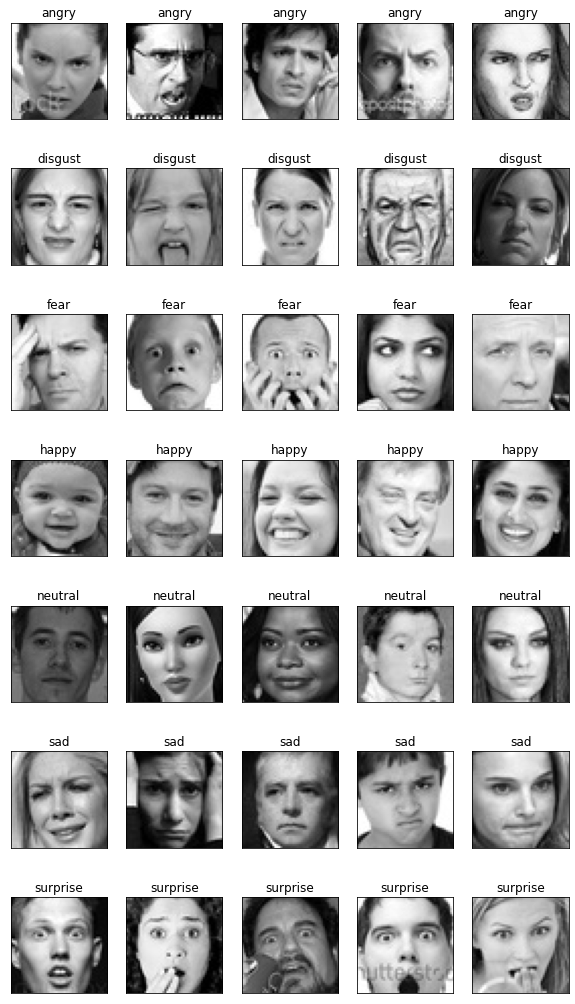

In [ ]:
import matplotlib.pyplot as plt
def plot_images(example_images, example_labels, transformation = None):
  
    plt.rc('image', cmap='gray')
    plt.figure(figsize=(10, 3*len(example_images)//5))
    i = 0
    for k in range(example_images.shape[0]):
        plt.subplot(len(example_images)//5+1,5,i+1)
        ax = plt.gca()
        ax.set_title(example_labels[k])
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        img = example_images[k].reshape(48,48).astype(np.uint8)
        if transformation:
            img = transformation(img)
        plt.imshow(img, cmap="gray")
        i = i+1

plot_images(example_images, example_labels)

# Feature Engineering

### Feature -- corner peaks

Plots corner peaks for sample images

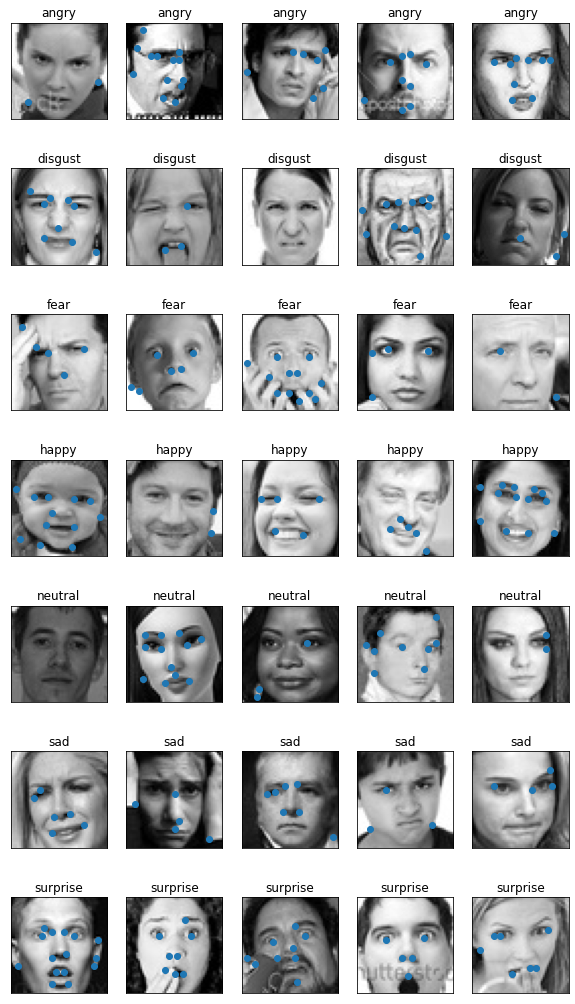

In [ ]:
def plot_corner_peaks(example_images, example_labels):
  
    plt.rc('image', cmap='gray')
    plt.figure(figsize=(10, 3*len(example_images)//5))
    i = 0
    for k in range(example_images.shape[0]):
        plt.subplot(len(example_images)//5+1,5,i+1)
        ax = plt.gca()
        ax.set_title(example_labels[k])
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        img = example_images[k].reshape(48,48).astype(np.uint8)
        keypoints = corner_peaks(corner_harris(img), min_distance=2, threshold_rel=0.05)
        ax.imshow(img, cmap="gray")
        ax.scatter(keypoints[:,1], keypoints[:,0])
        #subpix = corner_subpix(img, keypoints, window_size=11)
        #orientations = corner_orientations(img, keypoints, octagon(3, 2))
        i = i+1

plot_corner_peaks(example_images, example_labels)

### Corner peaks for sharpened image

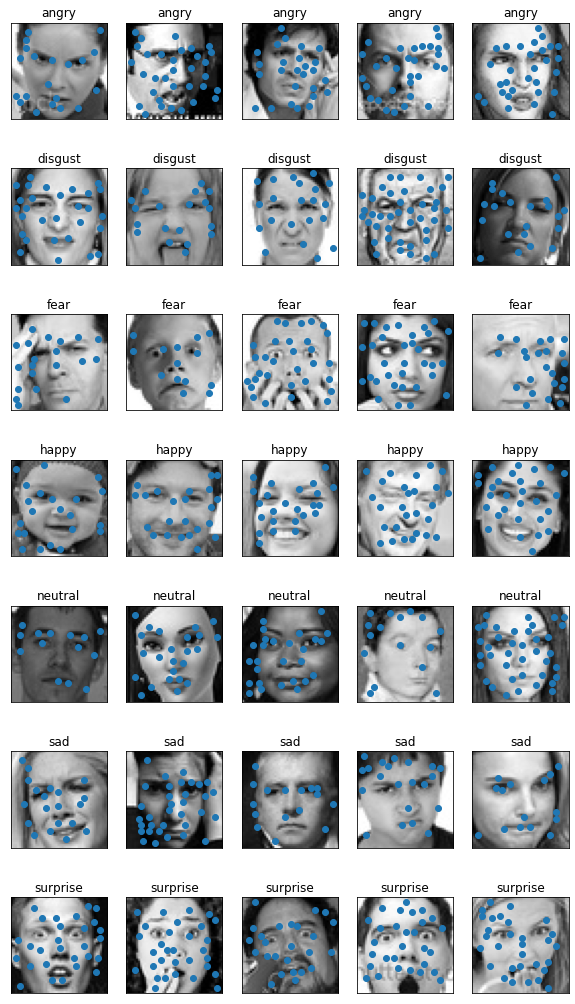

In [ ]:
def plot_sharp_corner_peaks(example_images, example_labels):
  
    plt.rc('image', cmap='gray')
    plt.figure(figsize=(10, 3*len(example_images)//5))
    i = 0
    for k in range(example_images.shape[0]):
        plt.subplot(len(example_images)//5+1,5,i+1)
        ax = plt.gca()
        ax.set_title(example_labels[k])
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        img = example_images[k].reshape(48,48).astype(np.uint8)
        blurred_f = ndimage.gaussian_filter(img, 3)
        alpha = 2
        sharpened = img+alpha*(img-blurred_f)

        keypoints = corner_peaks(corner_harris(sharpened), min_distance=2, threshold_rel=0.05)
        ax.imshow(img, cmap="gray")
        ax.scatter(keypoints[:,1], keypoints[:,0])
        #subpix = corner_subpix(img, keypoints, window_size=11)
        #orientations = corner_orientations(img, keypoints, octagon(3, 2))
        i = i+1

plot_sharp_corner_peaks(example_images, example_labels)

Conclusion: corner features are not usable for this classification problem because they don't produce a consistent vector

### Eigen Faces

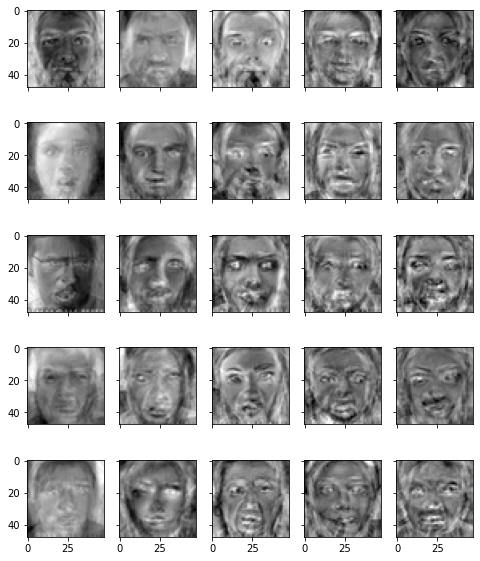

In [ ]:
pca = PCA().fit(example_images)
# Take the first K principal components as eigenfaces
n_components = 50
eigenfaces = pca.components_[:n_components]
 
# Show the first 16 eigenfaces
fig, axes = plt.subplots(5,5,sharex=True,sharey=True,figsize=(8,10))
for i in range(25):
    axes[i%5][i//5].imshow(eigenfaces[i].reshape(48,48), cmap="gray")
plt.show()

We see that a lot of encoded parts of images are just areas of brightness and darkness which tells us that we need to normalize our images before attempting classification.

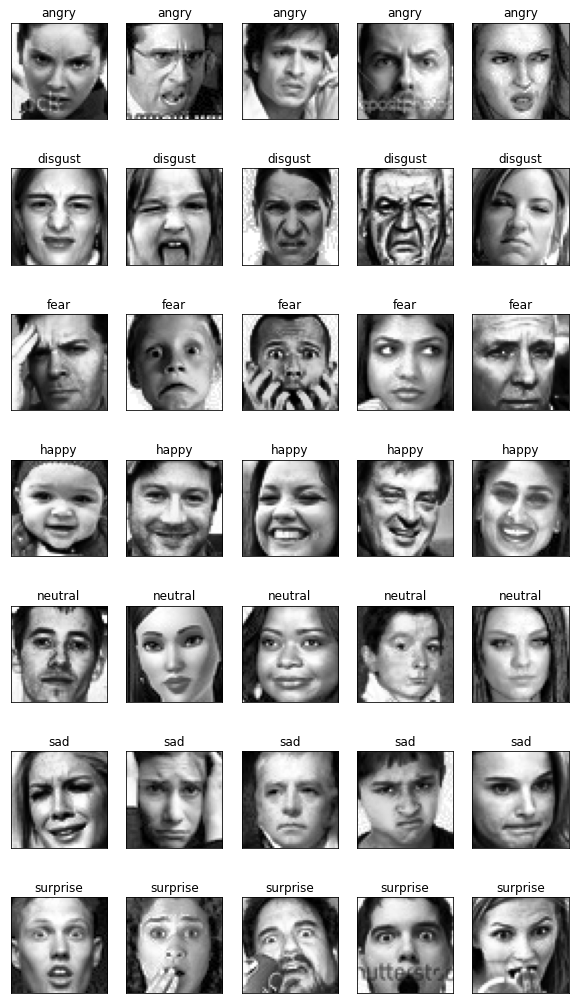

In [ ]:
# Histogram normalization
plot_images(example_images, example_labels, cv2.equalizeHist)

In [ ]:
# Normalized images
X_train_norm = np.empty(shape=(len(X_train), 48*48))
for i in range(len(X_train)):
    img = X_train[i].reshape(48, 48).astype(np.uint8)
    equ = cv2.equalizeHist(img)
    X_train_norm[i] = equ.reshape(48*48)

X_test_norm = np.empty(shape=(len(X_test), 48*48))
for i in range(len(X_test)):
    img = X_test[i].reshape(48, 48).astype(np.uint8)
    equ = cv2.equalizeHist(img)
    X_test_norm[i] = equ.reshape(48*48)

X_valid_norm = np.empty(shape=(len(X_valid), 48*48))
for i in range(len(X_valid)):
    img = X_valid[i].reshape(48, 48).astype(np.uint8)
    equ = cv2.equalizeHist(img)
    X_valid_norm[i] = equ.reshape(48*48)

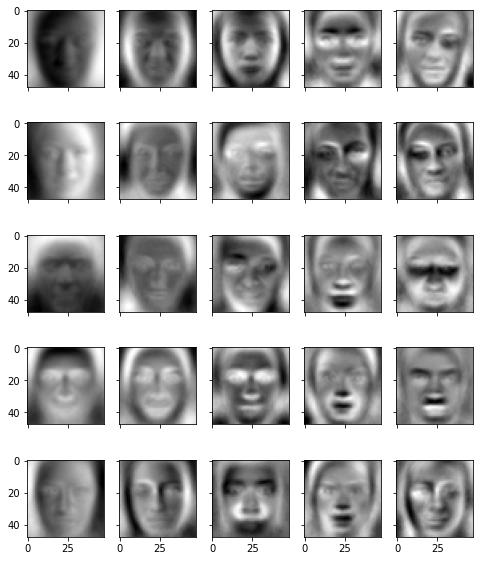

In [ ]:
pca = PCA().fit(X_train_norm)
# Take the first K principal components as eigenfaces
n_components = 50
eigenfaces = pca.components_[:n_components]
 
# Show the first 25 eigenfaces
fig, axes = plt.subplots(5,5,sharex=True,sharey=True,figsize=(8,10))
for i in range(25):
    axes[i%5][i//5].imshow(eigenfaces[i].reshape(48,48), cmap="gray")
plt.show()

Face Alignment

In [ ]:
from imutils.face_utils import FaceAligner, shape_to_np, FACIAL_LANDMARKS_68_IDXS
from google.colab.patches import cv2_imshow
predictor = dlib.shape_predictor("/content/drive/MyDrive/281/shape_predictor_68_face_landmarks.dat")
detector = dlib.get_frontal_face_detector()

fa = FaceAligner(predictor, desiredFaceWidth=48, desiredFaceHeight=48)
# img = example_images[3].reshape(48,48).astype(np.uint8)
def align_face(img):
  # cv2_imshow(img)
  gray = img
  rects = detector(gray, 2)
  faceAligned = img
  # loop over the face detections
  for rect in rects:
      shape = shape_to_np(predictor(gray, rect))
      (lStart, lEnd) = FACIAL_LANDMARKS_68_IDXS["left_eye"]
      (rStart, rEnd) = FACIAL_LANDMARKS_68_IDXS["right_eye"]
      leftEyePts = shape[lStart:lEnd]
      rightEyePts = shape[rStart:rEnd]

      # compute the center of mass for each eye
      leftEyeCenter = leftEyePts.mean(axis=0).astype("int")
      rightEyeCenter = rightEyePts.mean(axis=0).astype("int")

      # compute the angle between the eye centroids
      dY = rightEyeCenter[1] - leftEyeCenter[1]
      dX = rightEyeCenter[0] - leftEyeCenter[0]
      angle = np.degrees(np.arctan2(dY, dX)) - 180

      # compute the desired right eye x-coordinate based on the
      # desired x-coordinate of the left eye
      desiredRightEyeX = 1.0 - fa.desiredLeftEye[0]

      # determine the scale of the new resulting image by taking
      # the ratio of the distance between eyes in the *current*
      # image to the ratio of distance between eyes in the
      # *desired* image
      dist = np.sqrt((dX ** 2) + (dY ** 2))
      desiredDist = (desiredRightEyeX - fa.desiredLeftEye[0])
      desiredDist *= fa.desiredFaceWidth
      scale = desiredDist / dist

      # compute center (x, y)-coordinates (i.e., the median point)
      # between the two eyes in the input image
      eyesCenter = (int((leftEyeCenter[0] + rightEyeCenter[0]) // 2),
          int((leftEyeCenter[1] + rightEyeCenter[1]) // 2))
      M = cv2.getRotationMatrix2D(eyesCenter, angle, scale)

      # update the translation component of the matrix
      tX = fa.desiredFaceWidth * 0.5
      tY = fa.desiredFaceHeight * fa.desiredLeftEye[1]
      M[0, 2] += (tX - eyesCenter[0])
      M[1, 2] += (tY - eyesCenter[1])

      # apply the affine transformation
      (w, h) = (fa.desiredFaceWidth, fa.desiredFaceHeight)
      faceAligned = cv2.warpAffine(img, M, (w, h),
        flags=cv2.INTER_CUBIC)
  return cv2.equalizeHist(faceAligned)

In [ ]:
X_train_aligned = np.empty(shape=(len(X_train), 48*48))
for i in range(len(X_train)):
    img = X_train[i].reshape(48, 48).astype(np.uint8)
    X_train_aligned[i] = align_face(img).reshape(48*48)

X_test_aligned = np.empty(shape=(len(X_test), 48*48))
for i in range(len(X_test)):
    img = X_test[i].reshape(48, 48).astype(np.uint8)
    X_test_aligned[i] = align_face(img).reshape(48*48)

X_valid_aligned = np.empty(shape=(len(X_valid), 48*48))
for i in range(len(X_valid)):
    img = X_valid[i].reshape(48, 48).astype(np.uint8)
    X_valid_aligned[i] = align_face(img).reshape(48*48)

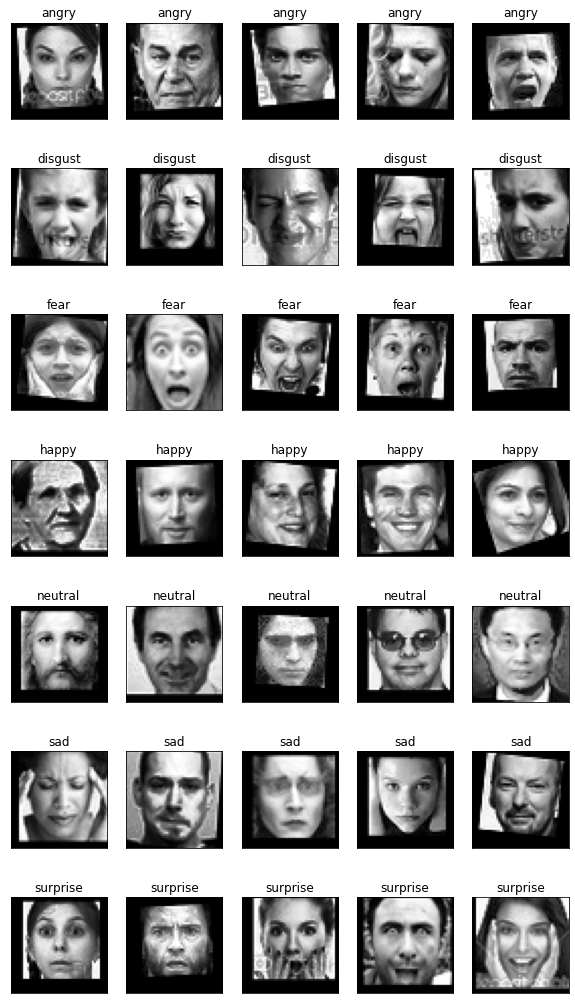

In [ ]:
plot_images(example_images, example_labels, align_face)

## Feature - HOG

In [ ]:
# Calculate the hog features for training and test data
def identify_hog_features(X_data):
    hog_features = np.empty(shape=(X_data.shape[0], 900))
    for i in range(X_data.shape[0]):
        img = X_data[i,:].reshape(48,48)
        blurred_f = ndimage.gaussian_filter(img, 3)
        alpha = 2
        sharpened = img+alpha*(img-blurred_f)
        hog_vec = hog(img, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=False)
        hog_features[i] = hog_vec
        
    return hog_features


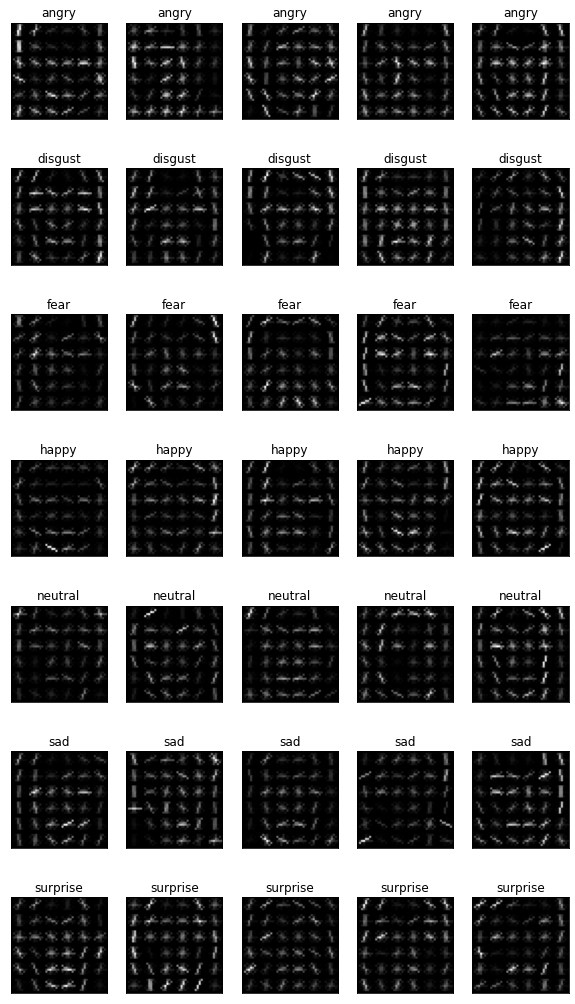

In [ ]:
def get_hog_image(img):
  hog_vec, hog_vis = hog(img, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)
  return hog_vis

plot_images(example_images, example_labels, get_hog_image)

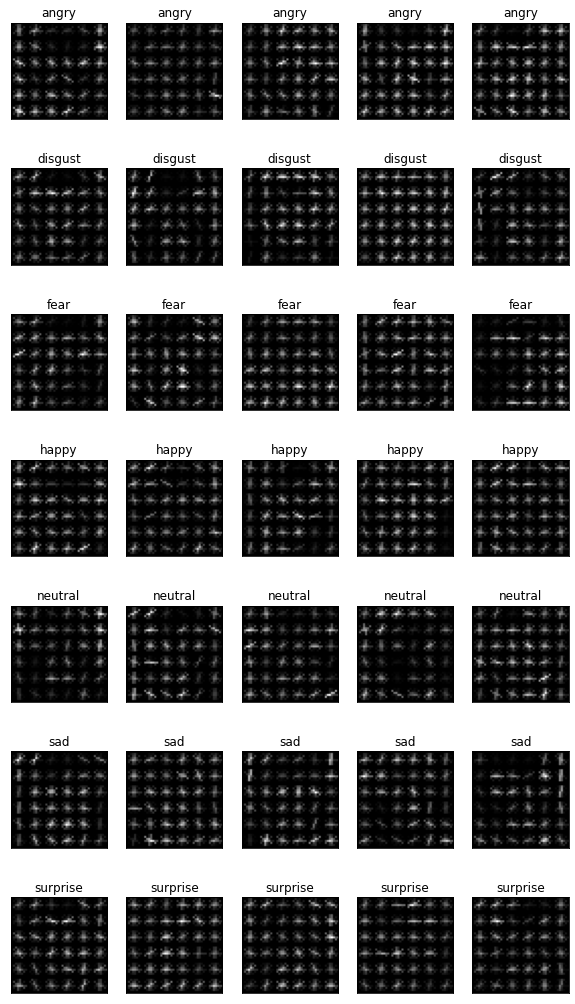

In [ ]:
def get_hog_sharp_image(img):
    blurred_f = ndimage.gaussian_filter(img, 3)
    alpha = 2
    sharpened = img+alpha*(img-blurred_f)
 
    hog_vec, hog_vis = hog(sharpened, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)
    return hog_vis

plot_images(example_images, example_labels, get_hog_sharp_image)

In [ ]:
emotions = {'angry':0, 'fear':1, 'happy':2, 'neutral':3, 'sad':4, 'surprise':5, 'disgust':6}
labels_to_emotion = {v: k for k,v in emotions.items()}
print(labels_to_emotion)

labels = np.empty(shape=(X_train.shape[0]))
for i in range(X_train.shape[0]):
    labels[i] = emotions[y_train[i]]

{0: 'angry', 1: 'fear', 2: 'happy', 3: 'neutral', 4: 'sad', 5: 'surprise', 6: 'disgust'}


tSNE visualization of HOG feature vector

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


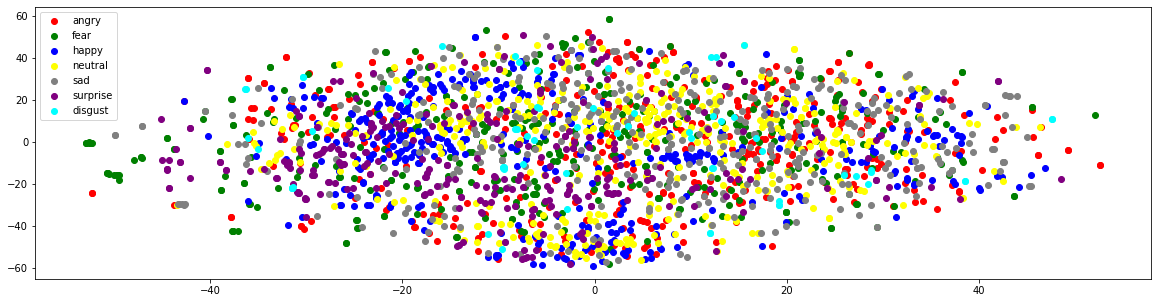

In [ ]:
# Calculate the hog features for training data
hog_features = identify_hog_features(X_train)

tsne = TSNE(n_components=2).fit_transform(hog_features)
tx = tsne[:, 0]
ty = tsne[:, 1]

# visualize for every class
fig = plt.figure()
ax = fig.add_subplot(111)
color_per_class = {0:'red', 1:'green', 2:'blue', 3:'yellow', 4:'gray', 5:'purple', 6:'cyan'}
for label in color_per_class:
    # find the samples belonging to the given class
    indices = np.where(labels == label)
    # extract coordinates of the points of this class only
    current_tx = np.take(tx, indices)
    current_ty = np.take(ty, indices)
    # add a scatter plot
    ax.scatter(current_tx, current_ty, c=color_per_class[label], label=labels_to_emotion[label])
ax.legend(loc='best')
plt.show()


PCA for HOG feature vector

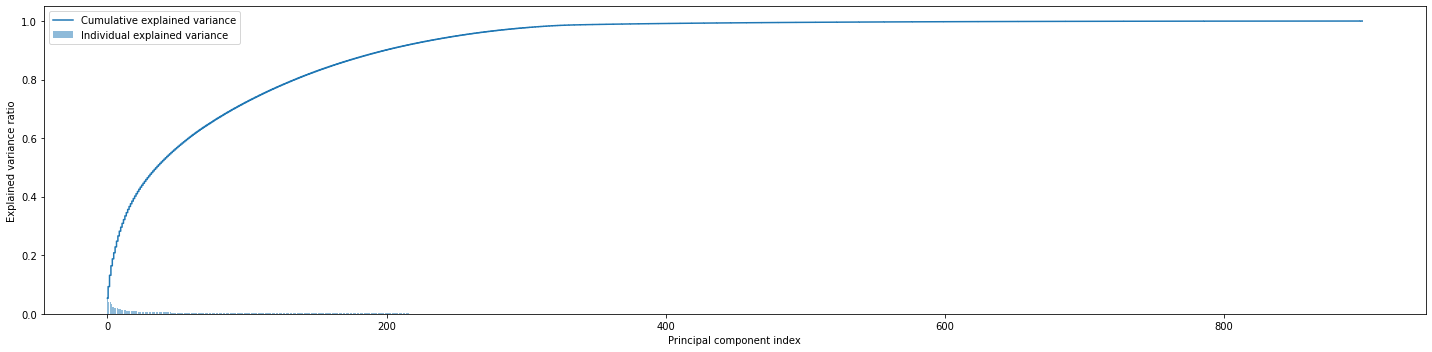

In [ ]:
pca = PCA()

#
# Determine transformed features
#
X_train_pca = pca.fit_transform(hog_features)
#
# Determine explained variance using explained_variance_ration_ attribute
#
exp_var_pca = pca.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

Conclusion: 300 components is appropriate amount for hog feature vector.

## LBP Feature (Local Binary Pattern)
Extensive experiments illustrate that LBP features are effective and efficient for facial expression recognition.

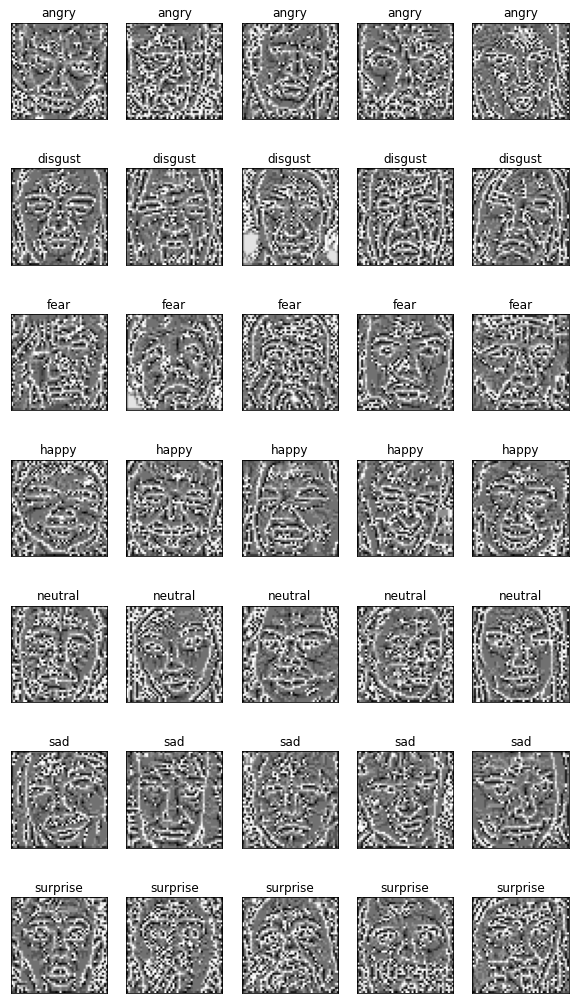

In [ ]:
# Visualize LBP images
def get_lbp_image(img):
    # settings for LBP
    radius = 1
    n_points = 8 * radius
    METHOD = 'uniform'
    lbp = local_binary_pattern(img, n_points, radius, METHOD)
    return lbp

plot_images(example_images, example_labels, get_lbp_image)

In [ ]:
def identify_lbp_features(X_data):
    features = np.empty(shape=(X_data.shape[0], 48*48))
    for i in range(X_data.shape[0]):
        img = X_data[i,:].reshape(48,48)
        lbp = local_binary_pattern(img, 8, 1, 'uniform')
        features[i] = lbp.reshape(48*48)
        
    return features

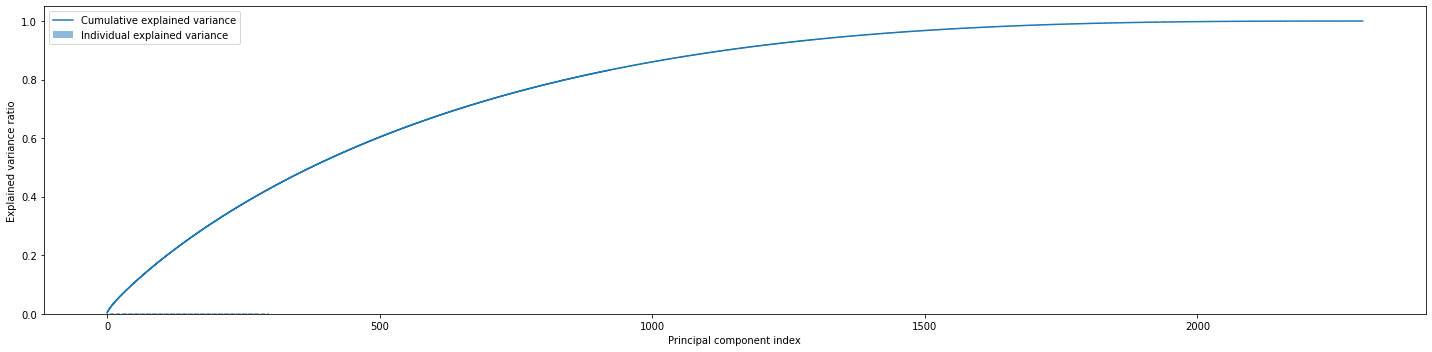

In [ ]:
pca = PCA()
X_train_pca = pca.fit_transform(identify_lbp_features(X_train))
exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## Feature -- face landmarks
Calculate face landmarks by using "face-recognition" library that is based on HOG with SVM classification.

In [ ]:

# Create a vector of facial features for training and test dataset
def identify_facial_features(X_data):
    num_face_landmarks = 55
    face_landmark_features = np.empty(shape=(X_data.shape[0], 48*48))
    for i in range(X_data.shape[0]):
        img = convert_to_uint(X_data[i,:].reshape(48, 48))
        face_landmarks_list = face_recognition.face_landmarks(img)
        if len(face_landmarks_list) == 0:
            face_landmark_features[i] = np.zeros(shape=(48*48))
        else:
            face_landmarks_list[0].pop('chin')
            M = get_rectify_matrix(face_landmarks_list[0])
            face_points = np.array([[element[0], element[1], 1] for sublist in face_landmarks_list[0].values() for element in sublist])
            rectified_face_points = (M @ face_points.T).T
            feature_vector = np.zeros(shape=(48, 48))
            for point in rectified_face_points:
                x, y = point
                if x < 48 and y < 48:
                    feature_vector[int(x - 1), int(y - 1)] = 1
            face_landmark_features[i] = feature_vector.flatten()

    return face_landmark_features

In [ ]:
def convert_to_uint(img1):
    if (img1.dtype != np.uint8 and np.all(img1 <= 1)):
        img = (255*img1).astype(np.uint8)
    else:
        img = img1.astype(np.uint8)
    return img

In [ ]:
def get_eye_corners(face_landmarks):
    return [face_landmarks['left_eye'][3], face_landmarks['right_eye'][0]]

def get_top_nose(face_landmarks):
    return face_landmarks['nose_bridge'][0]

def get_rectify_matrix(face_landmarks):
    left_eye, right_eye = get_eye_corners(face_landmarks)
    nose_top = get_top_nose(face_landmarks)
    degrees = math.degrees(math.atan2(right_eye[1] - left_eye[1], right_eye[0] - left_eye[0]))
    M = cv2.getRotationMatrix2D(center=left_eye, angle=degrees, scale=1)
    nose_center = (20, 20)
    tx = nose_center[0] - nose_top[0]
    ty = nose_center[1] - nose_top[1]
    T = np.array([[1, 0, tx], [0, 1, ty], [0, 0, 1]])
    return M @ T

def center_face(img, face_landmarks):
    rotated_img = cv2.warpAffine(img, get_rectify_matrix(face_landmarks), dsize=(48, 48))
    return rotated_img


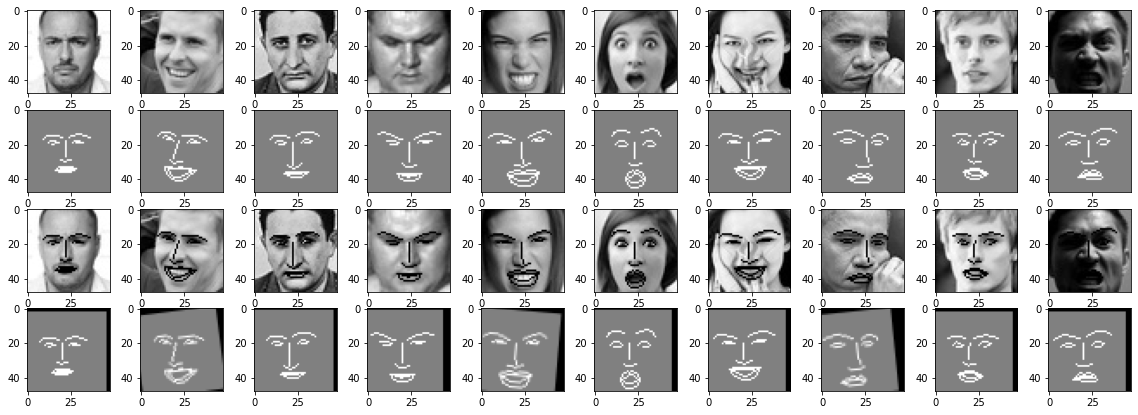

In [ ]:
# it uses Histogram of Oriented Gradients (HOG) and Linear SVM classifier for face detection.
# It is also combined with an image pyramid and a sliding window detection scheme.

from PIL import Image, ImageDraw
n = 10
f = plt.figure(figsize=(20,7))
for i in range(n):
    img = convert_to_uint(X_train[i,:].reshape(48,48))
    face_landmarks_list = face_recognition.face_landmarks(img)
    pil_image = Image.fromarray(img)
    # display(pil_image.resize((256,256)))

    d = ImageDraw.Draw(pil_image)
    canvas = Image.new('RGB', (48, 48), "gray")
    canvas_d = ImageDraw.Draw(canvas)

    for face_landmarks in face_landmarks_list:
        # Print the location of each facial feature in this image
        facial_features = [
          # 'chin',
          'left_eyebrow',
          'right_eyebrow',
          'nose_bridge',
          'nose_tip',
          'left_eye',
          'right_eye',
          'top_lip',
          'bottom_lip'
        ]

        # for facial_feature in facial_features:
        #     print("The {} in this face has the following points: {}".format(facial_feature, face_landmarks[facial_feature]))

        # Let's trace out each facial feature in the image with a line!
        for facial_feature in facial_features:
            d.line(face_landmarks[facial_feature], width=1)
            canvas_d.line(face_landmarks[facial_feature], width=1)
  
    # Make a grid with face landmarks
    f.add_subplot(4, n, i + 1)
    plt.imshow(img, cmap='gray')
    f.add_subplot(4, n, n + i + 1)
    plt.imshow(np.array(canvas))
    f.add_subplot(4, n, 2*n + i + 1)
    plt.imshow(np.array(pil_image), cmap="gray")
    f.add_subplot(4, n, 3*n + i + 1)
    plt.imshow(center_face(np.array(canvas), face_landmarks_list[0]), cmap="gray")
    # display(pil_image.resize((256,256)))
    # display(canvas.resize((256,256)))

Explained variance:  [0.0184855  0.01542251 0.01367426 0.01276836 0.01112481 0.00967587
 0.00935515 0.00877646 0.00847226 0.00808681 0.00796596 0.0077334
 0.00755221 0.00741372 0.00705115 0.00692932 0.00669937 0.00652108
 0.00646531 0.00629128 0.00609346 0.00605571 0.00593598 0.00580824
 0.00572459 0.00565177 0.00543162 0.0053232  0.005306   0.00515134
 0.00511341 0.00504361 0.00499597 0.00494034 0.00486568 0.0047977
 0.00475539 0.00467253 0.00466807 0.00462914 0.00456453 0.00450668
 0.00446954 0.00443774 0.00441015 0.00432707 0.00425774 0.00419479
 0.00419305 0.00414327 0.00408241 0.00406986 0.00403689 0.00397661
 0.00394383 0.00388145 0.00384041 0.00383546 0.00378379 0.00377705
 0.00375625 0.00369939 0.00365862 0.00364692 0.0036275  0.00359538
 0.00354477 0.00352868 0.00349941 0.00347221 0.00345468 0.00343202
 0.00339985 0.00338443 0.00336037 0.00333545 0.0033064  0.00329058
 0.00327358 0.00325486 0.00322112 0.00319528 0.00316488 0.00314137
 0.00313168 0.00311811 0.00309386 0.0030591

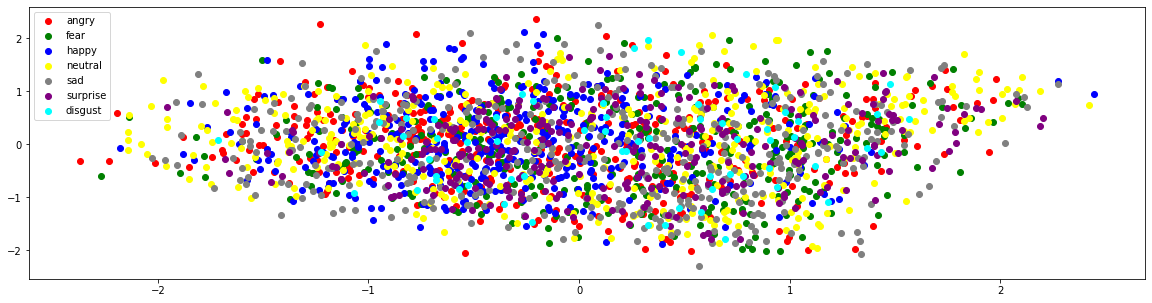

In [ ]:
pca = PCA(n_components=300)
components = pca.fit_transform(identify_facial_features(X_train))
print('Explained variance: ', pca.explained_variance_ratio_)
tx = components[:, 0]
ty = components[:, 1]

# visualize for every class
fig = plt.figure()
ax = fig.add_subplot(111)
color_per_class = {0:'red', 1:'green', 2:'blue', 3:'yellow', 4:'gray', 5:'purple', 6:'cyan'}
for label in color_per_class:
    # find the samples belonging to the given class
    indices = np.where(labels == label)
    # extract coordinates of the points of this class only
    current_tx = np.take(tx, indices)
    current_ty = np.take(ty, indices)
    # add a scatter plot
    ax.scatter(current_tx, current_ty, c=color_per_class[label], label=labels_to_emotion[label])
ax.legend(loc='best')
plt.show()

In [ ]:
def plotConfusion_matrix(model, dataset, true_label, pred_label):
  '''this function is to plot confusion matrix base on model, dataset and labels'''
  cm = confusion_matrix(true_label, pred_label)

  # Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
  cm_df = pd.DataFrame(cm,
                      index = ['angry', 'fear', 'happy', 'neutral', 'sad', 'surprise', 'disgust'], 
                      columns = ['angry', 'fear', 'happy', 'neutral', 'sad', 'surprise', 'disgust'])
  #Plotting the confusion matrix
  plt.figure(figsize=(10,10))
  sns.heatmap(cm_df, annot=True,fmt='g')
  plt.title(model + ' Confusion Matrix on ' + dataset )
  plt.ylabel('Actual Facial Expression')
  plt.xlabel('Predicted Facial Expression')
  plt.show()

In [ ]:
def printScores(model, dataset, true_label, pred_label):
    print(model +" multiclass accuracy score on " + dataset + ": ", "{:.6f}".format(accuracy_score(true_label, pred_label)))
    print(model +" multiclass recall score on " + dataset + ": ", "{:.6f}".format(recall_score(true_label, pred_label, average="macro")))
    print(model +" multiclass precision score on "+ dataset + ": ", "{:.6f}".format(precision_score(true_label, pred_label, average="macro")))
    print(model +" multiclass f1 score on "+ dataset + ": ", "{:.6f}".format(f1_score(true_label, pred_label, average="macro")))

# Machine Learning Models

## KNN

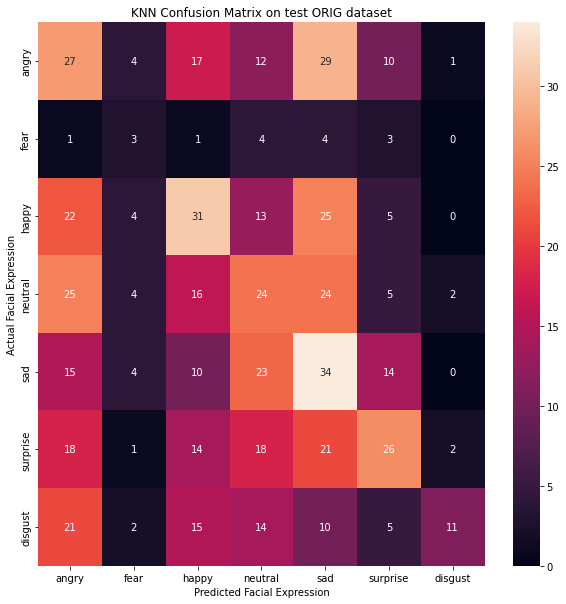

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
plotConfusion_matrix('KNN', 'test ORIG dataset', y_test, y_pred)

In [ ]:
printScores("KNN", "test ORIG dataset",  y_test, y_pred)

KNN multiclass accuracy score on test ORIG dataset:  0.262626
KNN multiclass recall score on test ORIG dataset:  0.249789
KNN multiclass precision score on test ORIG dataset:  0.309587
KNN multiclass f1 score on test ORIG dataset:  0.249609


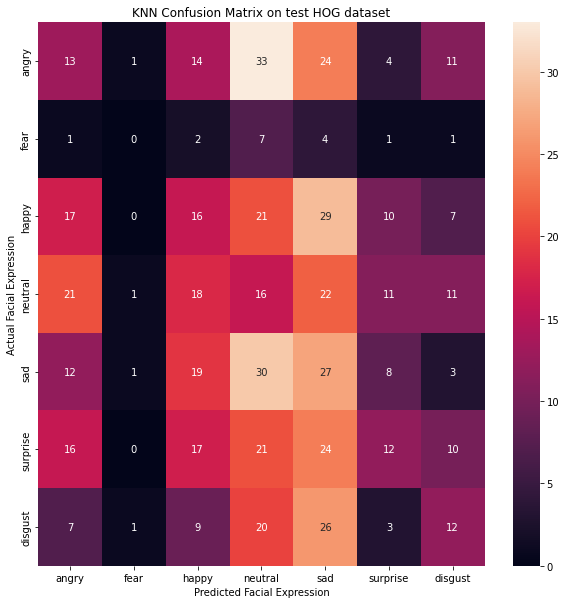

In [ ]:
pca = PCA(n_components=300)
X_train_hog = pca.fit_transform(identify_hog_features(X_train))
X_test_hog = pca.fit_transform(identify_hog_features(X_test))

knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model.fit(X_train_hog, y_train)
y_pred = knn_model.predict(X_test_hog)
plotConfusion_matrix('KNN', 'test HOG dataset', y_test, y_pred)

In [ ]:
printScores("KNN", "test HOG dataset",  y_test, y_pred)

KNN multiclass accuracy score on test HOG dataset:  0.161616
KNN multiclass recall score on test HOG dataset:  0.141978
KNN multiclass precision score on test HOG dataset:  0.151730
KNN multiclass f1 score on test HOG dataset:  0.140662


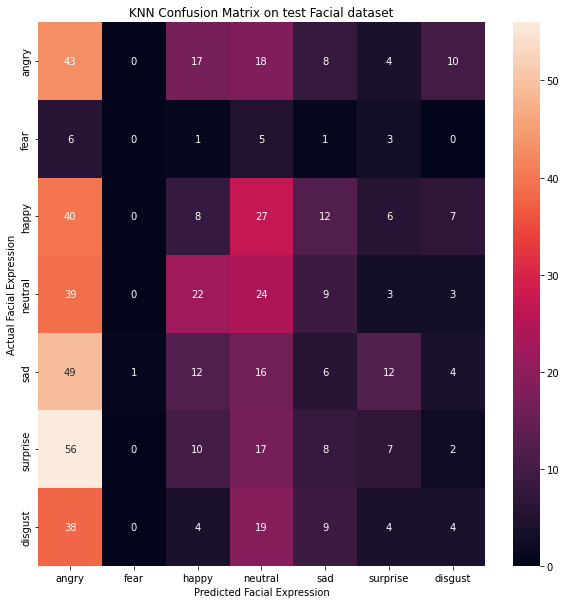

In [ ]:
pca = PCA(n_components=300)
X_train_facial = pca.fit_transform(identify_facial_features(X_train))
X_test_facial = pca.fit_transform(identify_facial_features(X_test))

knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model.fit(X_train_facial, y_train)
y_pred = knn_model.predict(X_test_facial)
plotConfusion_matrix('KNN', 'test Facial dataset', y_test, y_pred)

In [ ]:
printScores("KNN", "test Facial dataset",  y_test, y_pred)

KNN multiclass accuracy score on test Facial dataset:  0.154882
KNN multiclass recall score on test Facial dataset:  0.133040
KNN multiclass precision score on test Facial dataset:  0.126183
KNN multiclass f1 score on test Facial dataset:  0.112768


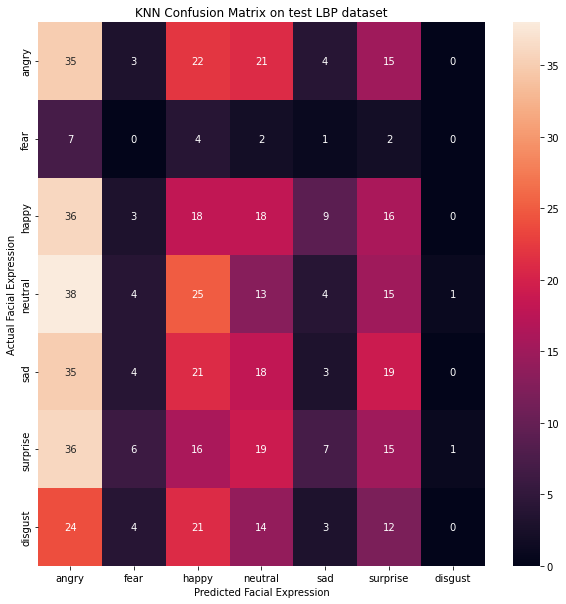

In [ ]:
pca = PCA(n_components=300)
X_train_lbp = pca.fit_transform(identify_lbp_features(X_train))
X_test_lbp = pca.fit_transform(identify_lbp_features(X_test))

knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model.fit(X_train_lbp, y_train)
y_pred = knn_model.predict(X_test_lbp)
plotConfusion_matrix('KNN', 'test LBP dataset', y_test, y_pred)

In [ ]:
printScores("KNN", "test LBP dataset",  y_test, y_pred)

KNN multiclass accuracy score on test LBP dataset:  0.163300
KNN multiclass recall score on test LBP dataset:  0.146071
KNN multiclass precision score on test LBP dataset:  0.126252
KNN multiclass f1 score on test LBP dataset:  0.126890


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


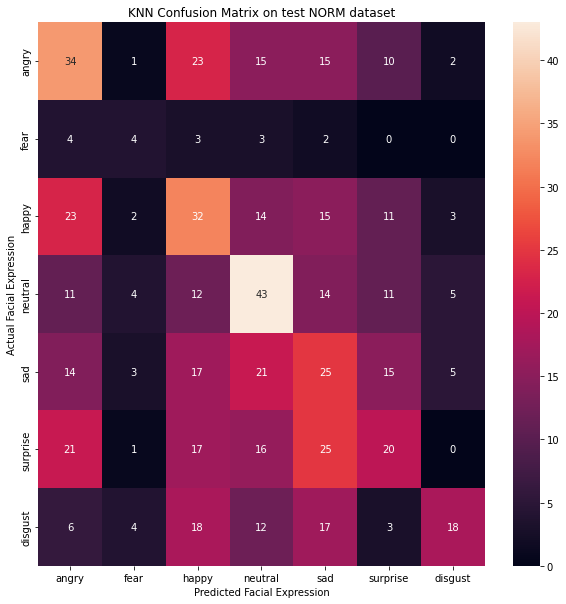

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model.fit(X_train_norm, y_train)
y_pred = knn_model.predict(X_test_norm)
plotConfusion_matrix('KNN', 'test NORM dataset', y_test, y_pred)

In [ ]:
printScores("KNN", "test NORM dataset",  y_test, y_pred)

KNN multiclass accuracy score on test NORM dataset:  0.296296
KNN multiclass recall score on test NORM dataset:  0.288681
KNN multiclass precision score on test NORM dataset:  0.310413
KNN multiclass f1 score on test NORM dataset:  0.287771


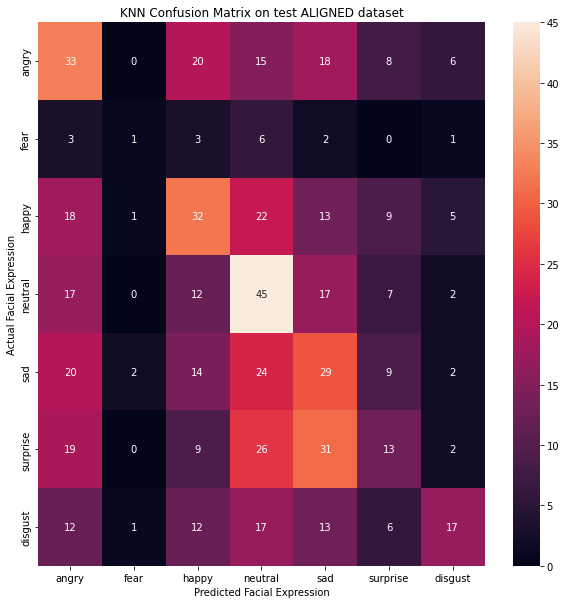

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model.fit(X_train_aligned, y_train)
y_pred = knn_model.predict(X_test_aligned)
plotConfusion_matrix('KNN', 'test ALIGNED dataset', y_test, y_pred)

In [ ]:
printScores("KNN", "test ALIGNED dataset",  y_test, y_pred)

KNN multiclass accuracy score on test ALIGNED dataset:  0.286195
KNN multiclass recall score on test ALIGNED dataset:  0.257207
KNN multiclass precision score on test ALIGNED dataset:  0.292290
KNN multiclass f1 score on test ALIGNED dataset:  0.256334


In [ ]:
# Combine aligned, norm datasets

#X_train_combined = X_train_hog + X_train_aligned + X_train_norm + X_train_lbp
#X_train_combined = [x+y+z for x,y,z in zip(X_train_hog, X_train_aligned, X_train_norm, X_train_lbp)]

X_train_combined = np.zeros((2 *len(X_train),48*48))
y_train_combined = []

for i in range(len(X_train)):
    X_train_combined[i,:] = X_train_aligned[i]
    y_train_combined.append(y_train[i])

j=0
for i in range(len(X_train), len(X_train) * 2):
    X_train_combined[i,:] = X_train_norm[j]
    y_train_combined.append(y_train[j])
    j += 1

print(X_train_combined.shape)
print(len(y_train_combined))

X_test_combined = np.zeros((2 *len(X_test),48*48))
y_test_combined = []

print(X_test_combined.shape)
for i in range(len(X_test)):
    X_test_combined[i,:] = X_test_aligned[i]
    y_test_combined.append(y_test[i])

j=0
for i in range(len(X_test), len(X_test) * 2):
    X_test_combined[i,:] = X_test_norm[j]
    y_test_combined.append(y_test[j])
    j += 1

print(X_test_combined.shape)
print(len(y_test_combined))



(4746, 2304)
4746
(1188, 2304)
(1188, 2304)
1188


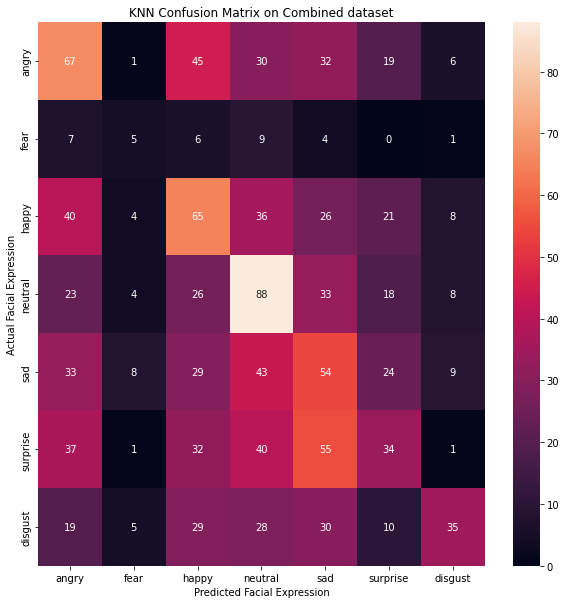

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model.fit(X_train_combined, y_train_combined)
y_pred = knn_model.predict(X_test_combined)
plotConfusion_matrix('KNN', 'Combined dataset', y_test_combined, y_pred)


In [ ]:
printScores("SVM", "Combined dataset",  y_test_combined, y_pred)

SVM multiclass accuracy score on Combined dataset:  0.292929
SVM multiclass recall score on Combined dataset:  0.274373
SVM multiclass precision score on Combined dataset:  0.298813
SVM multiclass f1 score on Combined dataset:  0.274770


## SVM

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


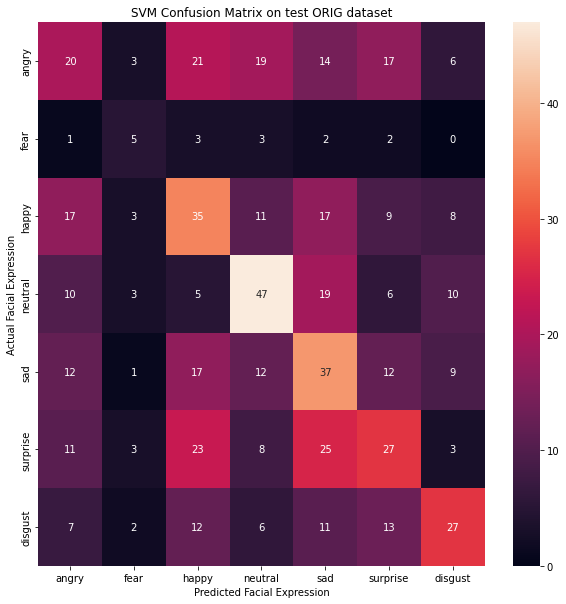

In [ ]:
# SVM with default hyperparameters
from sklearn.svm import LinearSVC
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
plotConfusion_matrix('SVM', 'test ORIG dataset', y_test, y_pred)

In [ ]:
printScores("SVM", "test ORIG dataset",  y_test, y_pred)

SVM multiclass accuracy score on test ORIG dataset:  0.333333
SVM multiclass recall score on test ORIG dataset:  0.331236
SVM multiclass precision score on test ORIG dataset:  0.327151
SVM multiclass f1 score on test ORIG dataset:  0.326439


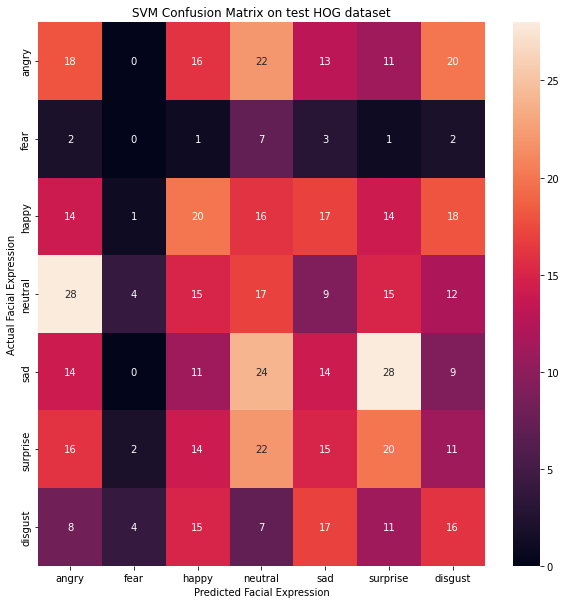

In [ ]:
pca = PCA(n_components=300)
X_train_hog = pca.fit_transform(identify_hog_features(X_train))
X_test_hog = pca.fit_transform(identify_hog_features(X_test))

svm_model = LinearSVC()
svm_model.fit(X_train_hog, y_train)
y_pred = svm_model.predict(X_test_hog)
plotConfusion_matrix('SVM', 'test HOG dataset', y_test, y_pred)

In [ ]:
printScores("SVM", "test HOG dataset",  y_test, y_pred)

SVM multiclass accuracy score on test HOG dataset:  0.176768
SVM multiclass recall score on test HOG dataset:  0.156447
SVM multiclass precision score on test HOG dataset:  0.155161
SVM multiclass f1 score on test HOG dataset:  0.155454


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


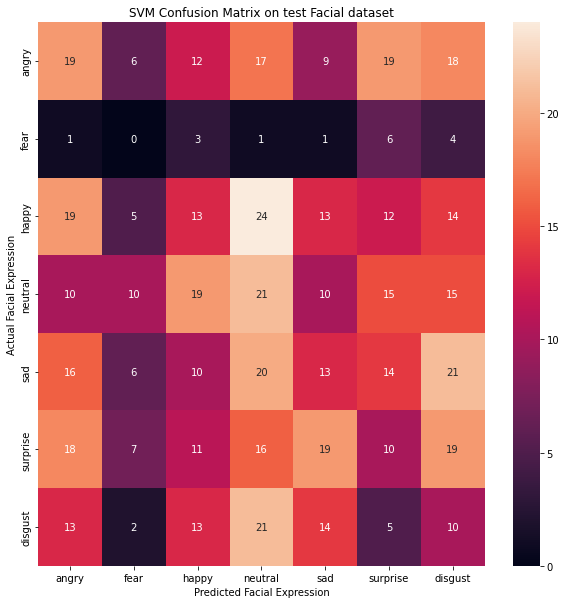

In [ ]:
pca = PCA(n_components=300)
X_train_facial = pca.fit_transform(identify_facial_features(X_train))
X_test_facial = pca.fit_transform(identify_facial_features(X_test))

svm_model = LinearSVC()
svm_model.fit(X_train_facial, y_train)
y_pred = svm_model.predict(X_test_facial)
plotConfusion_matrix('SVM', 'test Facial dataset', y_test, y_pred)

In [ ]:
printScores("SVM", "test Facial dataset",  y_test, y_pred)

SVM multiclass accuracy score on test Facial dataset:  0.144781
SVM multiclass recall score on test Facial dataset:  0.126886
SVM multiclass precision score on test Facial dataset:  0.131491
SVM multiclass f1 score on test Facial dataset:  0.127988


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


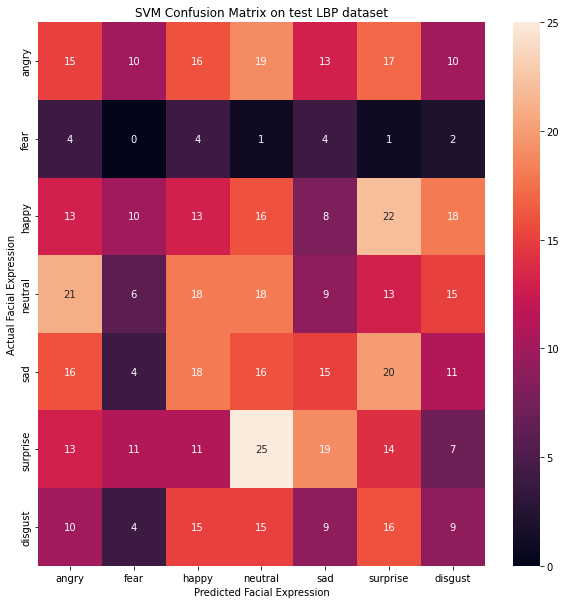

In [ ]:
pca = PCA(n_components=300)
X_train_lbp = pca.fit_transform(identify_lbp_features(X_train))
X_test_lbp = pca.fit_transform(identify_lbp_features(X_test))

svm_model = LinearSVC()
svm_model.fit(X_train_lbp, y_train)
y_pred = svm_model.predict(X_test_lbp)
plotConfusion_matrix('SVM', 'test LBP dataset', y_test, y_pred)

In [ ]:
printScores("SVM", "test LBP dataset",  y_test, y_pred)

SVM multiclass accuracy score on test LBP dataset:  0.141414
SVM multiclass recall score on test LBP dataset:  0.123626
SVM multiclass precision score on test LBP dataset:  0.131321
SVM multiclass f1 score on test LBP dataset:  0.126919


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


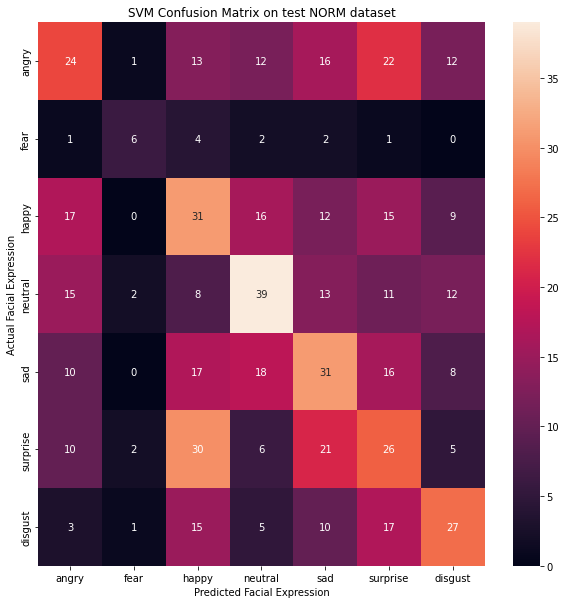

In [ ]:
from sklearn.svm import LinearSVC
svm_model = LinearSVC()
svm_model.fit(X_train_norm, y_train)
y_pred = svm_model.predict(X_test_norm)
plotConfusion_matrix('SVM', 'test NORM dataset', y_test, y_pred)

In [ ]:
printScores("SVM", "test NORM dataset",  y_test, y_pred)

SVM multiclass accuracy score on test NORM dataset:  0.309764
SVM multiclass recall score on test NORM dataset:  0.318736
SVM multiclass precision score on test NORM dataset:  0.338073
SVM multiclass f1 score on test NORM dataset:  0.326234


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


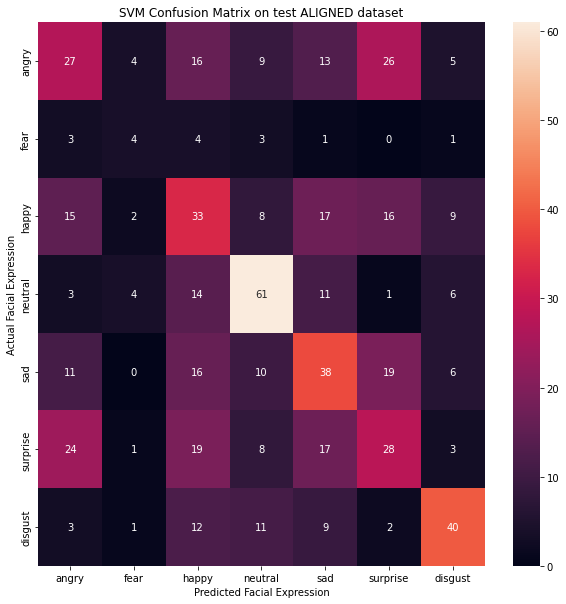

In [ ]:
from sklearn.svm import LinearSVC
svm_model = LinearSVC()
svm_model.fit(X_train_aligned, y_train)
y_pred = svm_model.predict(X_test_aligned)
plotConfusion_matrix('SVM', 'test ALIGNED dataset', y_test, y_pred)

In [ ]:
printScores("SVM", "ALIGNED dataset",  y_test, y_pred)

SVM multiclass accuracy score on test ALIGNED dataset:  0.388889
SVM multiclass recall score on test ALIGNED dataset:  0.376117
SVM multiclass precision score on test ALIGNED dataset:  0.377463
SVM multiclass f1 score on test ALIGNED dataset:  0.375832


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


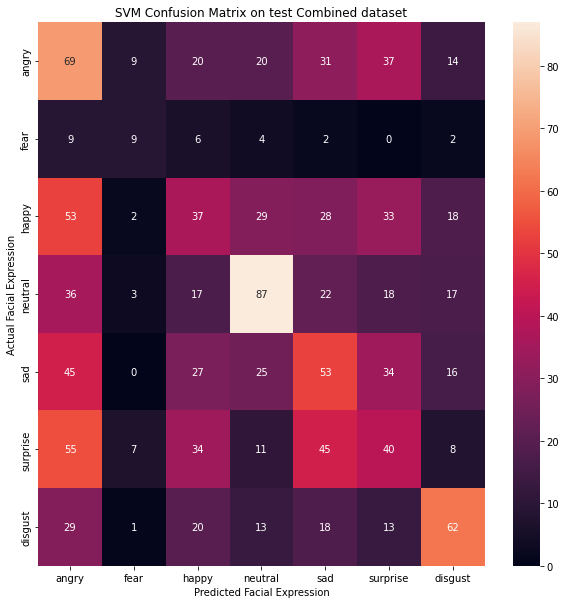

In [ ]:
from sklearn.svm import LinearSVC
svm_model = LinearSVC()
svm_model.fit(X_train_combined, y_train_combined)
y_pred = svm_model.predict(X_test_combined)
plotConfusion_matrix('SVM', 'test Combined dataset', y_test_combined, y_pred)

In [ ]:
printScores("SVM", "Combined dataset",  y_test_combined, y_pred)

SVM multiclass accuracy score on Combined dataset:  0.287879
SVM multiclass recall score on Combined dataset:  0.273310
SVM multiclass precision score on Combined dataset:  0.304486
SVM multiclass f1 score on Combined dataset:  0.277607


## MLP

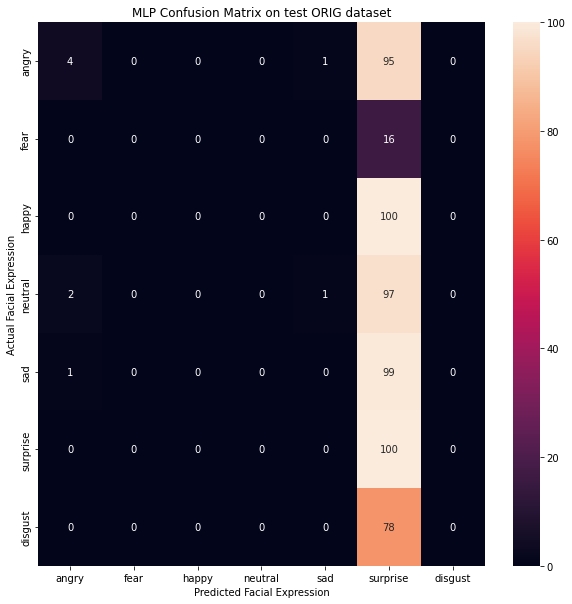

In [ ]:
mlp_clf = MLPClassifier()
mlp_clf.fit(X_train, y_train)
y_pred = mlp_clf.predict(X_test)
plotConfusion_matrix('MLP', 'test ORIG dataset', y_test, y_pred)

In [ ]:
printScores("MLP", "test ORIG set",  y_test, y_pred)

MLP multiclass accuracy score on test ORIG set:  0.175084
MLP multiclass recall score on test ORIG set:  0.148571
MLP multiclass precision score on test ORIG set:  0.106053
MLP multiclass f1 score on test ORIG set:  0.052391


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


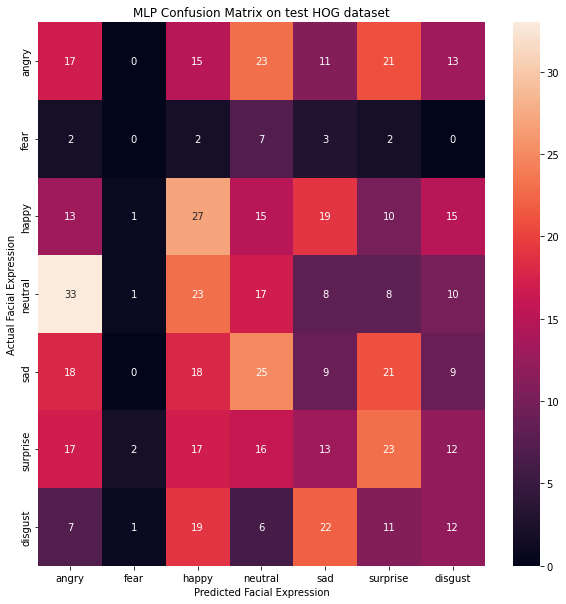

In [ ]:
pca = PCA(n_components=300)
X_train_hog = pca.fit_transform(identify_hog_features(X_train))
X_test_hog = pca.fit_transform(identify_hog_features(X_test))

mlp_clf = MLPClassifier()
mlp_clf.fit(X_train_hog, y_train)
y_pred = mlp_clf.predict(X_test_hog)
plotConfusion_matrix('MLP', 'test HOG dataset', y_test, y_pred)

In [ ]:
printScores("MLP", "test HOG set",  y_test, y_pred)

MLP multiclass accuracy score on test HOG set:  0.176768
MLP multiclass recall score on test HOG set:  0.154835
MLP multiclass precision score on test HOG set:  0.150352
MLP multiclass f1 score on test HOG set:  0.152049


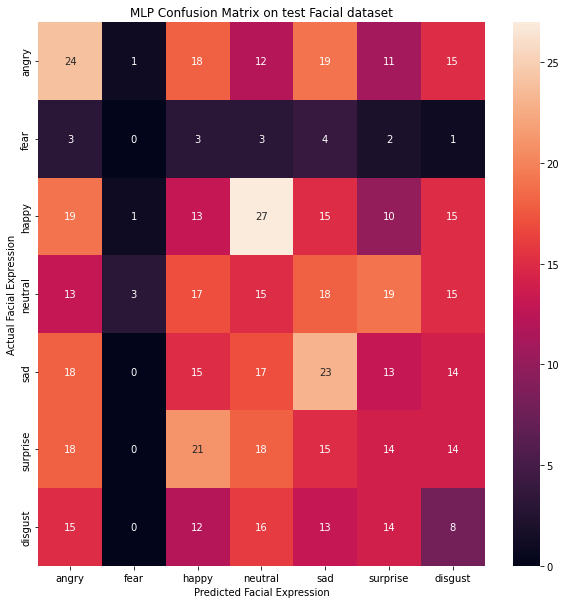

In [ ]:
pca = PCA(n_components=300)
X_train_facial = pca.fit_transform(identify_facial_features(X_train))
X_test_facial = pca.fit_transform(identify_facial_features(X_test))

mlp_clf = MLPClassifier()
mlp_clf.fit(X_train_facial, y_train)
y_pred = mlp_clf.predict(X_test_facial)
plotConfusion_matrix('MLP', 'test Facial dataset', y_test, y_pred)

In [ ]:
printScores("MLP", "test Facial set",  y_test, y_pred)

MLP multiclass accuracy score on test Facial set:  0.163300
MLP multiclass recall score on test Facial set:  0.141795
MLP multiclass precision score on test Facial set:  0.138510
MLP multiclass f1 score on test Facial set:  0.139812


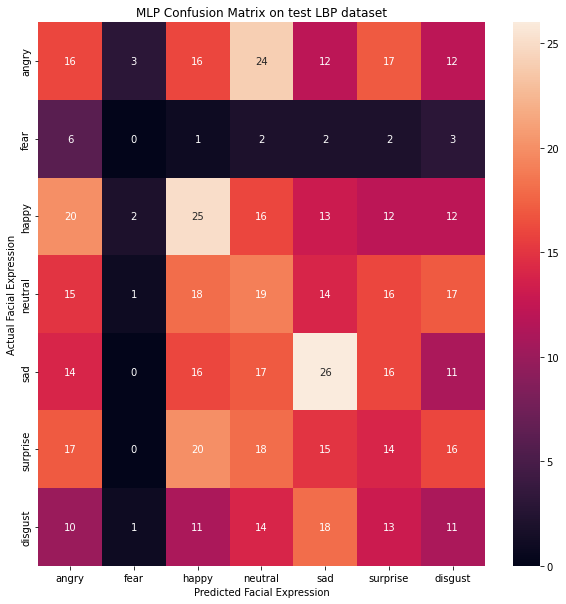

In [ ]:
pca = PCA(n_components=300)
X_train_lbp = pca.fit_transform(identify_lbp_features(X_train))
X_test_lbp = pca.fit_transform(identify_lbp_features(X_test))

mlp_clf = MLPClassifier()
mlp_clf.fit(X_train_lbp, y_train)
y_pred = mlp_clf.predict(X_test_lbp)
plotConfusion_matrix('MLP', 'test LBP dataset', y_test, y_pred)

In [ ]:
printScores("MLP", "test LBP set",  y_test, y_pred)

MLP multiclass accuracy score on test LBP set:  0.186869
MLP multiclass recall score on test LBP set:  0.163004
MLP multiclass precision score on test LBP set:  0.159906
MLP multiclass f1 score on test LBP set:  0.161283


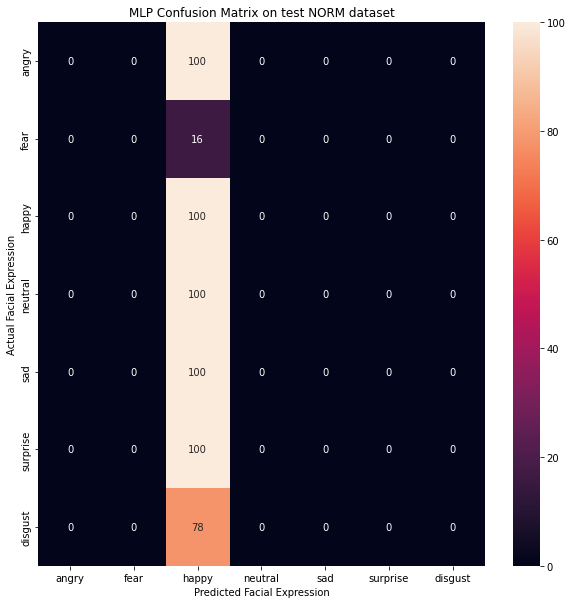

In [ ]:
mlp_clf = MLPClassifier()
mlp_clf.fit(X_train_norm, y_train)
y_pred = mlp_clf.predict(X_test_norm)
plotConfusion_matrix('MLP', 'test NORM dataset', y_test, y_pred)

In [ ]:
printScores("MLP", "test NORM set",  y_test, y_pred)

MLP multiclass accuracy score on test NORM set:  0.168350
MLP multiclass recall score on test NORM set:  0.142857
MLP multiclass precision score on test NORM set:  0.024050
MLP multiclass f1 score on test NORM set:  0.041169


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


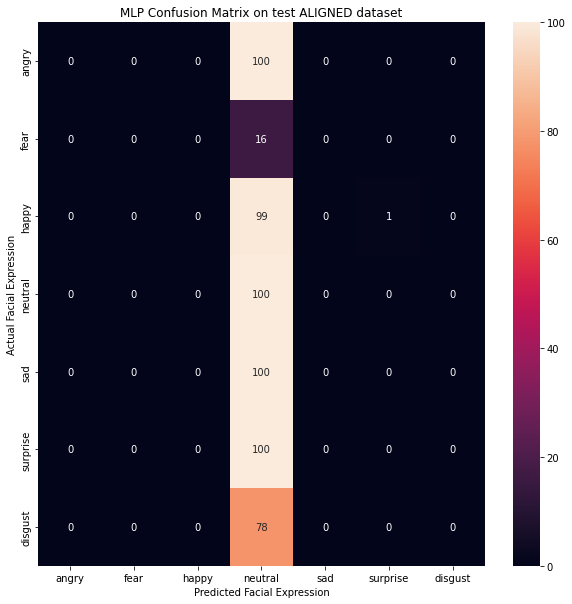

In [ ]:
mlp_clf = MLPClassifier()
mlp_clf.fit(X_train_aligned, y_train)
y_pred = mlp_clf.predict(X_test_aligned)
plotConfusion_matrix('MLP', 'test ALIGNED dataset', y_test, y_pred)

In [ ]:
printScores("MLP", "test ALIGNED set",  y_test, y_pred)

MLP multiclass accuracy score on test ALIGNED set:  0.168350
MLP multiclass recall score on test ALIGNED set:  0.142857
MLP multiclass precision score on test ALIGNED set:  0.024091
MLP multiclass f1 score on test ALIGNED set:  0.041229


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


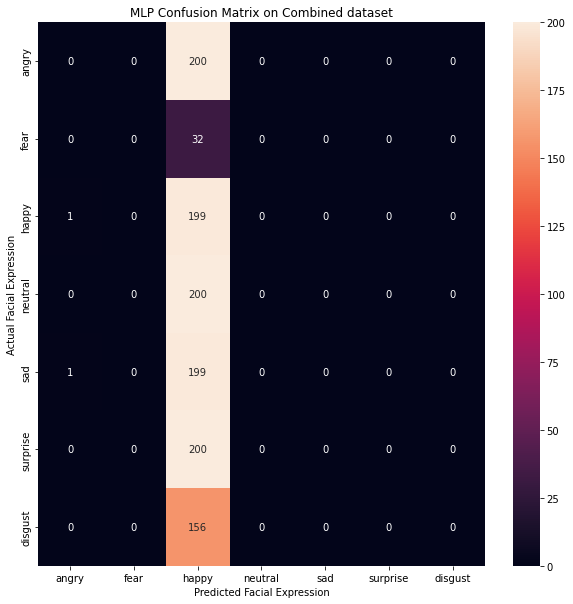

In [ ]:
mlp_clf = MLPClassifier()
mlp_clf.fit(X_train_combined, y_train_combined)
y_pred = mlp_clf.predict(X_test_combined)
plotConfusion_matrix('MLP', 'Combined dataset', y_test_combined, y_pred)

In [ ]:
printScores("MLP", "Combined set",  y_test_combined, y_pred)

MLP multiclass accuracy score on Combined set:  0.167508
MLP multiclass recall score on Combined set:  0.142143
MLP multiclass precision score on Combined set:  0.023970
MLP multiclass f1 score on Combined set:  0.041022


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Hyperparameter tuning

## We will use the validation dataset to identify hyperparameters for the SVM model thatperformed the best using the Aligned dataset

In [ ]:
# identifying hyperparameters for SVC using the Aligned dataset

from sklearn.model_selection import GridSearchCV

penalty = ['l1', 'l2']
loss = ['squared_hinge']
C=[1.0, 2.0, 3.0]
max_iter = [1000, 2000, 3000]
dual =[False]
#Convert to dictionary
hyperparameters = dict(penalty=penalty,loss=loss,C=C, max_iter=max_iter, dual=dual)

#Create new SVC object
svm_model = LinearSVC()

#Use GridSearch to identify best model
clf = GridSearchCV(svm_model, hyperparameters, cv=5, scoring="accuracy", n_jobs = -1)

#Fit the model on validation dataset
best_model = clf.fit(X_valid_aligned,y_valid)


In [ ]:
print(best_model.best_estimator_.get_params())

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'loss': 'squared_hinge', 'max_iter': 1000, 'multi_class': 'ovr', 'penalty': 'l2', 'random_state': None, 'tol': 0.0001, 'verbose': 0}


In [ ]:
penalty = [best_model.best_estimator_.get_params()['penalty']]    
C = [best_model.best_estimator_.get_params()['C']]
max_iter = [best_model.best_estimator_.get_params()['max_iter']]

In [ ]:
from sklearn.model_selection import GridSearchCV

tol = [0.0001,0.00001,0.000001]
loss = ['squared_hinge', 'hinge']
multi_class = ['ovr', 'crammer_singer']
dual = [True,False]

#Convert to dictionary
hyperparameters = dict(penalty=penalty,loss=loss,C=C,max_iter=max_iter,dual=dual,tol=tol,multi_class=multi_class)
#Create new SVC object
svm_model = LinearSVC()

#Use GridSearch to identify best model
clf = GridSearchCV(svm_model, hyperparameters, cv=5, scoring="accuracy", n_jobs = -1)

#Fit the model on validation dataset
best_model = clf.fit(X_valid_aligned,y_valid)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/svm/_classes.py", line 257, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py", line 1185, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_class, penalt

In [ ]:
print(best_model.best_estimator_.get_params())

{'C': 1.0, 'class_weight': None, 'dual': True, 'fit_intercept': True, 'intercept_scaling': 1, 'loss': 'squared_hinge', 'max_iter': 1000, 'multi_class': 'ovr', 'penalty': 'l2', 'random_state': None, 'tol': 1e-05, 'verbose': 0}


In [ ]:
print('Best penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best loss:', best_model.best_estimator_.get_params()['loss'])
print('Best C:', best_model.best_estimator_.get_params()['C'])
print('Best tol:', best_model.best_estimator_.get_params()['tol'])
print('Best multi_class:', best_model.best_estimator_.get_params()['multi_class'])
print('Best max_iter:', best_model.best_estimator_.get_params()['max_iter']) 
print('Best dual:', best_model.best_estimator_.get_params()['dual']) 

Best penalty: l2
Best loss: squared_hinge
Best C: 1.0
Best tol: 1e-05
Best multi_class: ovr
Best max_iter: 1000
Best dual: True


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


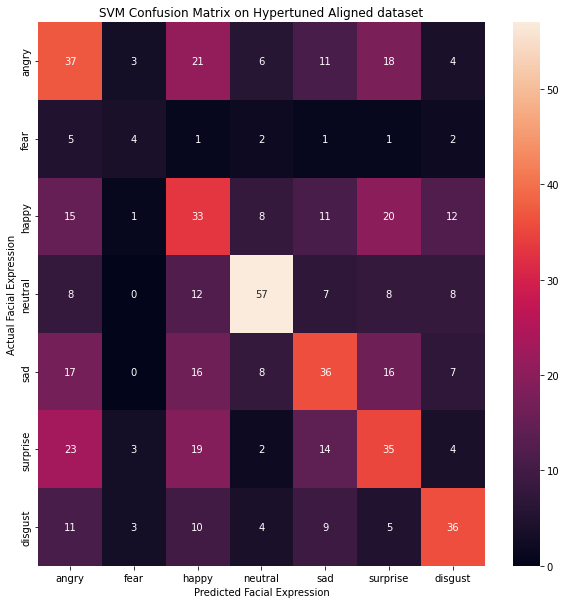

In [ ]:
penalty = best_model.best_estimator_.get_params()['penalty']
loss = best_model.best_estimator_.get_params()['loss']
C = best_model.best_estimator_.get_params()['C']
tol = best_model.best_estimator_.get_params()['tol']
multi_class = best_model.best_estimator_.get_params()['multi_class']
max_iter = best_model.best_estimator_.get_params()['max_iter']
dual = best_model.best_estimator_.get_params()['dual']

svm_model = LinearSVC(penalty=penalty,loss=loss,C=C, tol=tol,multi_class=multi_class,max_iter=max_iter, dual=dual)
svm_model.fit(X_train_aligned, y_train)
y_pred = svm_model.predict(X_test_aligned)
plotConfusion_matrix('SVM', 'Hypertuned Aligned dataset', y_test, y_pred)


In [ ]:
printScores("SVM", "Combined set",  y_test, y_pred)

SVM multiclass accuracy score on Combined set:  0.400673
SVM multiclass recall score on Combined set:  0.384505
SVM multiclass precision score on Combined set:  0.398849
SVM multiclass f1 score on Combined set:  0.390401


In [ ]:
print('Best penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best loss:', best_model.best_estimator_.get_params()['loss'])
print('Best C:', best_model.best_estimator_.get_params()['C'])
print('Best tol:', best_model.best_estimator_.get_params()['tol'])
print('Best multi_class:', best_model.best_estimator_.get_params()['multi_class'])
print('Best max_iter:', best_model.best_estimator_.get_params()['max_iter']) 
print('Best dual:', best_model.best_estimator_.get_params()['dual']) 

Best penalty: l2
Best loss: squared_hinge
Best C: 1.0
Best tol: 1e-05
Best multi_class: ovr
Best max_iter: 1000
Best dual: True


In [ ]:
from sklearn.model_selection import GridSearchCV

penalty = [best_model.best_estimator_.get_params()['penalty']]    
C = [best_model.best_estimator_.get_params()['C']]
max_iter = [best_model.best_estimator_.get_params()['max_iter']]

tol = [0.0001,0.00001,0.000001]
loss = ['squared_hinge']
multi_class = ['ovr', 'crammer_singer']
dual = [False]

#Convert to dictionary
hyperparameters = dict(penalty=penalty,loss=loss,C=C,max_iter=max_iter,dual=dual,tol=tol,multi_class=multi_class)
#Create new SVC object
svm_model = LinearSVC()

#Use GridSearch to identify best model
clf = GridSearchCV(svm_model, hyperparameters, cv=5, scoring="accuracy", n_jobs = -1)

#Fit the model on validation dataset
best_model = clf.fit(X_valid_aligned,y_valid)

In [ ]:
print('Best penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best loss:', best_model.best_estimator_.get_params()['loss'])
print('Best C:', best_model.best_estimator_.get_params()['C'])
print('Best tol:', best_model.best_estimator_.get_params()['tol'])
print('Best multi_class:', best_model.best_estimator_.get_params()['multi_class'])
print('Best max_iter:', best_model.best_estimator_.get_params()['max_iter']) 
print('Best dual:', best_model.best_estimator_.get_params()['dual']) 

Best penalty: l2
Best loss: squared_hinge
Best C: 1.0
Best tol: 0.0001
Best multi_class: ovr
Best max_iter: 1000
Best dual: False


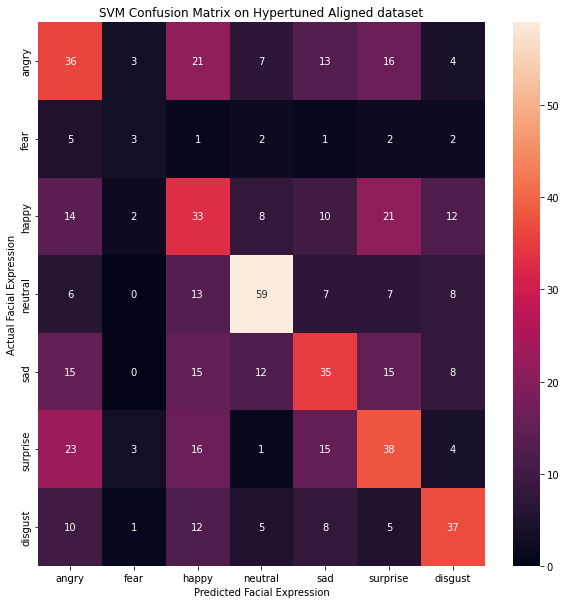

In [ ]:
penalty = best_model.best_estimator_.get_params()['penalty']
loss = best_model.best_estimator_.get_params()['loss']
C = best_model.best_estimator_.get_params()['C']
tol = best_model.best_estimator_.get_params()['tol']
multi_class = best_model.best_estimator_.get_params()['multi_class']
max_iter = best_model.best_estimator_.get_params()['max_iter']
dual = best_model.best_estimator_.get_params()['dual']

svm_model = LinearSVC(penalty=penalty,loss=loss,C=C, tol=tol,multi_class=multi_class,max_iter=max_iter, dual=dual)
svm_model.fit(X_train_aligned, y_train)
y_pred = svm_model.predict(X_test_aligned)
plotConfusion_matrix('SVM', 'Hypertuned Aligned dataset', y_test, y_pred)


In [ ]:
printScores("SVM", "Combined set",  y_test, y_pred)

SVM multiclass accuracy score on Combined set:  0.405724
SVM multiclass recall score on Combined set:  0.381694
SVM multiclass precision score on Combined set:  0.393887
SVM multiclass f1 score on Combined set:  0.386629


# New Section

## CNN

In [ ]:
import keras
import keras.utils
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, InceptionResNetV2
from keras import regularizers
from keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.optimizers import Adam, RMSprop, SGD, Adamax


In [ ]:
y_train_cnn = y_train
y_test_cnn = y_test
print(len(y_train))

print(emotions[y_train[1]])

for i in range(len(y_train)):
    y_train_cnn[i] = emotions[y_train[i]]

for i in range(len(y_test)):
    y_test_cnn[i] = emotions[y_test[i]]


In [ ]:

datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)

In [ ]:
from sklearn.preprocessing import RobustScaler
# Use Robustscaler to standardize data
rc = RobustScaler()

# Estimate the sample mean and standard deviation for each feature in x_train
rc.fit(X_train)

# use the two parameters to standardize both train and test data
X_train_std = rc.transform(X_train)
X_test_std = rc.transform(X_test)

In [ ]:
# Initialize dataframe to store model results
my_test_df=pd.DataFrame()

print ("Optimizer = Adam")
model= tf.keras.models.Sequential()
model.add(Conv2D(128,(5,5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
  
model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten()) 
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
  
model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

model.compile(
  optimizer = Adam(),
  loss='categorical_crossentropy', 
  metrics=['accuracy']
)

datagen.fit(X_train_aligned.reshape(X_train_aligned.shape[0], 48, 48, 1))

history = model.fit(datagen.flow(X_train_std.reshape(X_train_std.shape[0], 48, 48, 1), y_train_cnn, subset='training'),
      validation_data=datagen.flow(X_test_std.reshape(X_test_std.shape[0], 48,48, 1), y_test_cnn, subset='validation'),
                epochs=256)

train_loss, train_acc = model.evaluate(X_train.reshape(X_train.shape[0], 48, 48, 1), y_train_cnn)
test_loss, test_acc = model.evaluate(X_test.reshape(X_test.shape[0], 48,48, 1), y_test_cnn)

my_df= pd.DataFrame(data=history.history) 
my_df["learning_rate"] = "Default"
my_df["batch_size"] = "Default"
my_df["blurring"] = "Yes"
my_df["optimizer"] = "Adam"
my_df["standardized"] = "Yes"
my_df["epoch"] = my_df.index +1
my_df["train_loss"] = train_loss
my_df["train_acc"] = train_acc
my_df["test_loss"] = test_loss
my_df["test_acc"] = test_acc

my_test_df = my_test_df.append(my_df, ignore_index=True) 

# write model output to csv file for futher analysis using pandas charts
my_test_df.to_csv("/content/drive/MyDrive/w207/CNN-Adam-Default-Epoch-256.csv", sep='\t', encoding='utf-8')